In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_grouped_evaluation_returns

In [3]:
plt.rc('font', size=12)

In [4]:
######
# MOPO
######
MP686 = get_results("MP686") # 0.1M Records
MP687 = get_results("MP687") 
MP688 = get_results("MP688") 
MP596 = get_results("MP596") # 0.25M Records
MP597 = get_results("MP597") 
MP598 = get_results("MP598") 
MP599 = get_results("MP599") # 0.5M Records
MP600 = get_results("MP600") 
MP601 = get_results("MP601") 
MP602 = get_results("MP602") # 1M Records
MP603 = get_results("MP603") 
MP604 = get_results("MP604") 
MP605 = get_results("MP605") # 2M Records
MP606 = get_results("MP606") 
MP607 = get_results("MP607") 
MP608 = get_results("MP608") # 3M Records
MP609 = get_results("MP609") 
MP610 = get_results("MP610") 

In [5]:
######
# MBPO
######
MP689 = get_results("MP689") # 0.25M Records
MP690 = get_results("MP690")
MP691 = get_results("MP691")
MP656 = get_results("MP656") # 0.25M Records
MP657 = get_results("MP657")
MP658 = get_results("MP658")
MP659 = get_results("MP659") # 0.5M Records
MP660 = get_results("MP660")
MP661 = get_results("MP661")
MP662 = get_results("MP662") # 1M Records
MP663 = get_results("MP663")
MP664 = get_results("MP664")
MP665 = get_results("MP665") # 2M Records
MP666 = get_results("MP666")
MP667 = get_results("MP667")
MP668 = get_results("MP668") # 3M Records
MP669 = get_results("MP669")
MP670 = get_results("MP670")

## MOPO

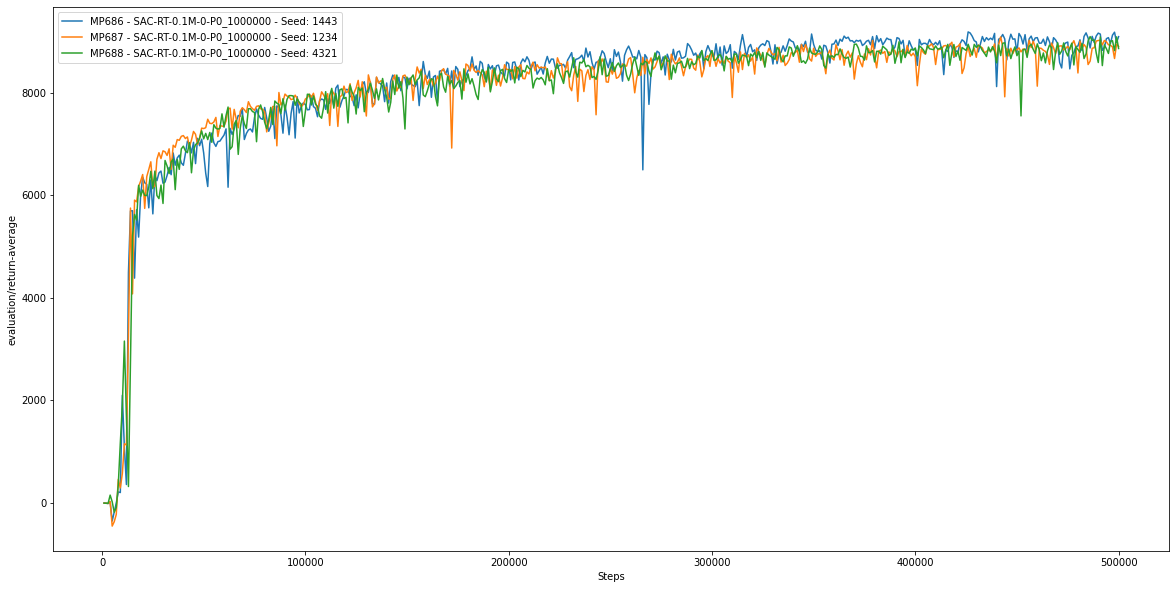

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP686,
    MP687,
    MP688,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

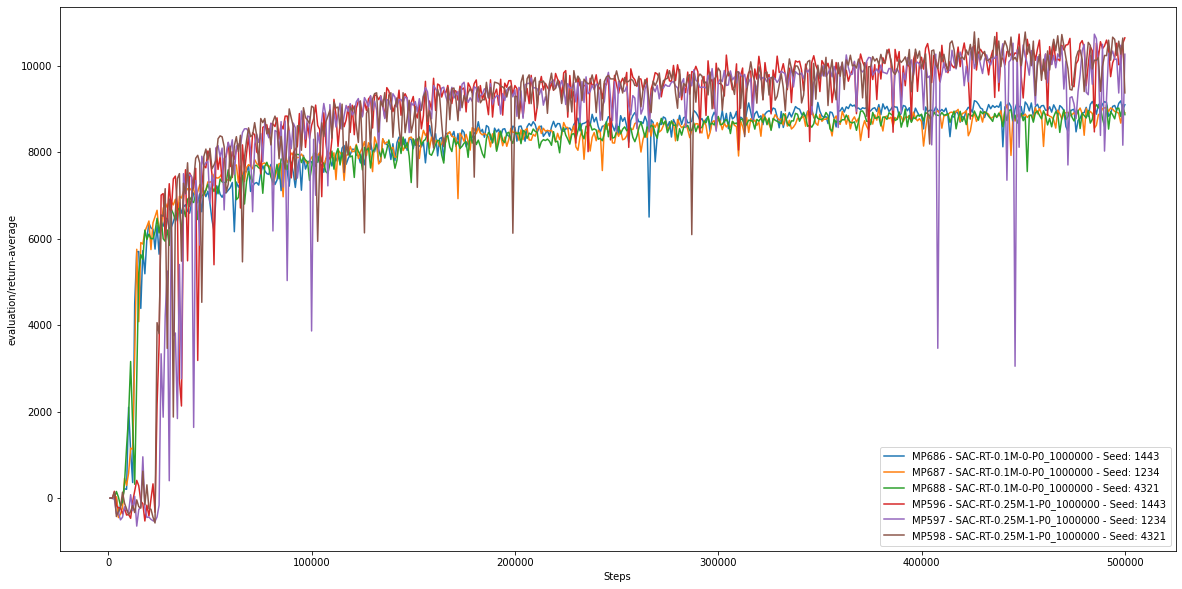

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP686,
    MP687,
    MP688,
    MP596,
    MP597,
    MP598,
    # MP599,
    # MP600,
    # MP601,
    # MP602,
    # MP603,
    # MP604,
    # MP605,
    # MP606,
    # MP607,
    # MP608,
    # MP609,
    # MP610,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

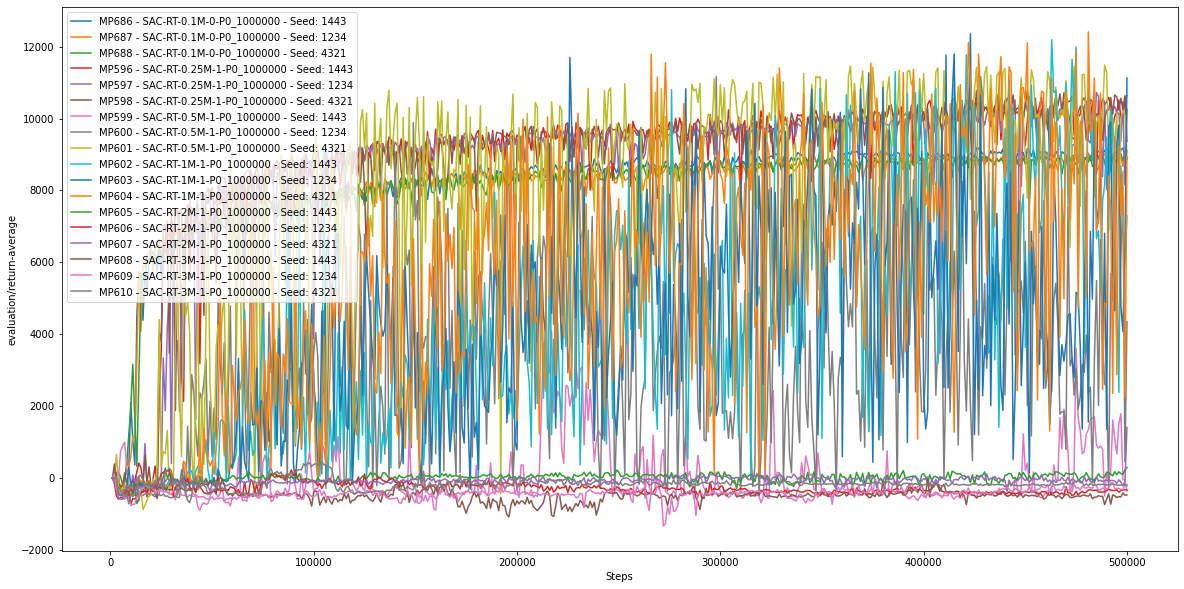

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP686,
    MP687,
    MP688,
    MP596,
    MP597,
    MP598,
    MP599,
    MP600,
    MP601,
    MP602,
    MP603,
    MP604,
    MP605,
    MP606,
    MP607,
    MP608,
    MP609,
    MP610,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

{'Steps: 0.1M': {'mean': 8956, 'std': 101, 'count': 3},
 'Steps: 0.25M': {'mean': 10091, 'std': 533, 'count': 3},
 'Steps: 0.5M': {'mean': 4334, 'std': 3830, 'count': 3},
 'Steps: 1M': {'mean': 9124, 'std': 1573, 'count': 3},
 'Steps: 2M': {'mean': 450, 'std': 721, 'count': 3},
 'Steps: 3M': {'mean': -302, 'std': 123, 'count': 3}}

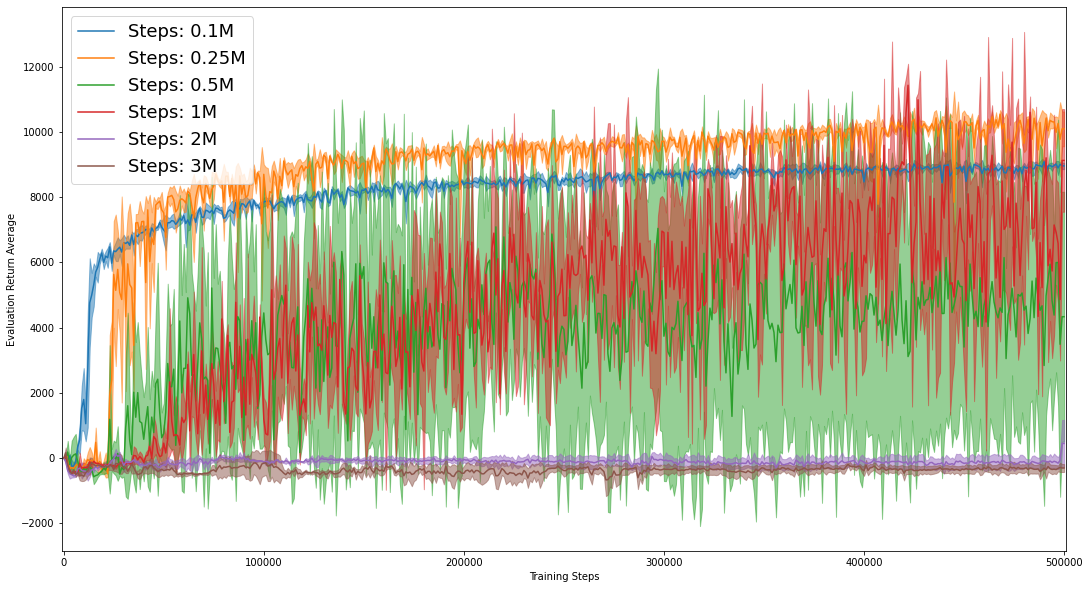

In [9]:
plot_grouped_evaluation_returns([
    ((MP686, MP687, MP688), 'Steps: 0.1M'),
    ((MP596, MP597, MP598), 'Steps: 0.25M'),
    ((MP599, MP600, MP601), 'Steps: 0.5M'),
    ((MP602, MP603, MP604), 'Steps: 1M'),
    ((MP605, MP606, MP607), 'Steps: 2M'),
    ((MP608, MP609, MP610), 'Steps: 3M'),
], save_path='ch4/softlearning_1M_records.png')

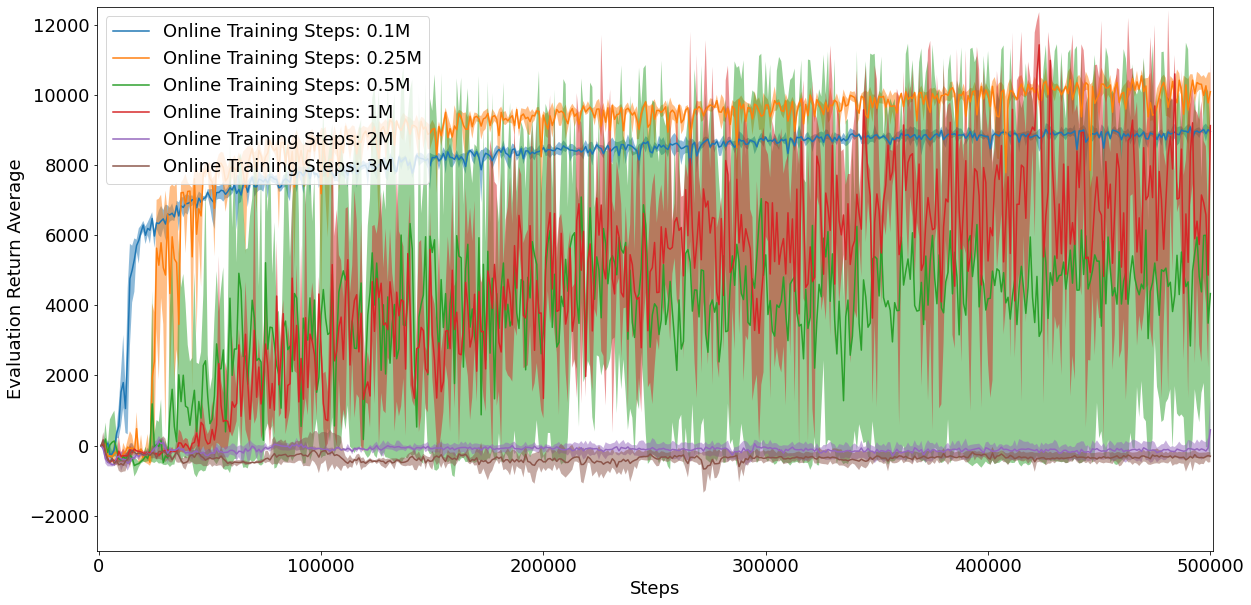

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

terminal_stats = {}
feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP686, MP687, MP688), '0.1'),
    ((MP596, MP597, MP598), '0.25'),
    ((MP599, MP600, MP601), '0.5'),
    ((MP602, MP603, MP604), '1'),
    ((MP605, MP606, MP607), '2'),
    ((MP608, MP609, MP610), '3'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    std_vals = stacked_data.std(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
    terminal_stats[exp_set[0].dataset] = {'mean': mean_vals[-1], 'std': std_vals[-1], 'text ': f'{mean_vals[-1]:.0f}±{std_vals[-1]:.0f}'}
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend()
pass

In [11]:
terminal_stats

{'SAC-RT-0.1M-0-P0_1000000': {'mean': 8956.076822916666,
  'std': 100.58469084334818,
  'text ': '8956±101'},
 'SAC-RT-0.25M-1-P0_1000000': {'mean': 10090.713541666666,
  'std': 533.2720079217931,
  'text ': '10091±533'},
 'SAC-RT-0.5M-1-P0_1000000': {'mean': 4334.456400553386,
  'std': 3829.9143138360655,
  'text ': '4334±3830'},
 'SAC-RT-1M-1-P0_1000000': {'mean': 9124.0986328125,
  'std': 1572.873632504256,
  'text ': '9124±1573'},
 'SAC-RT-2M-1-P0_1000000': {'mean': 450.26861572265625,
  'std': 721.1700937692657,
  'text ': '450±721'},
 'SAC-RT-3M-1-P0_1000000': {'mean': -302.4504089355469,
  'std': 122.71408569917755,
  'text ': '-302±123'}}

## MBPO

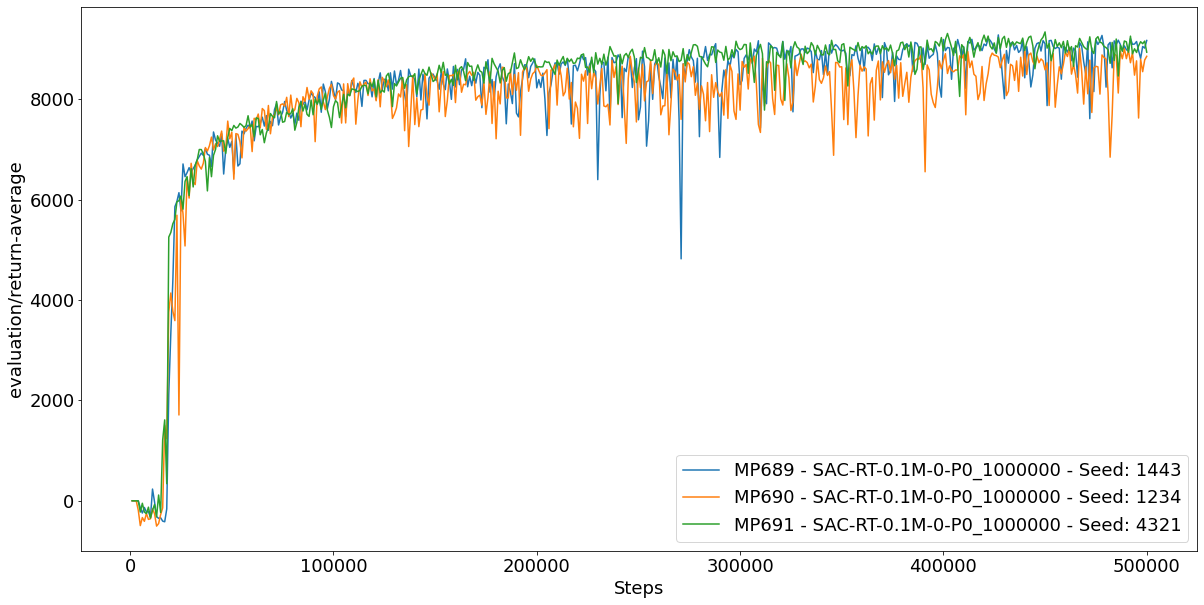

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP689,
    MP690,
    MP691,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

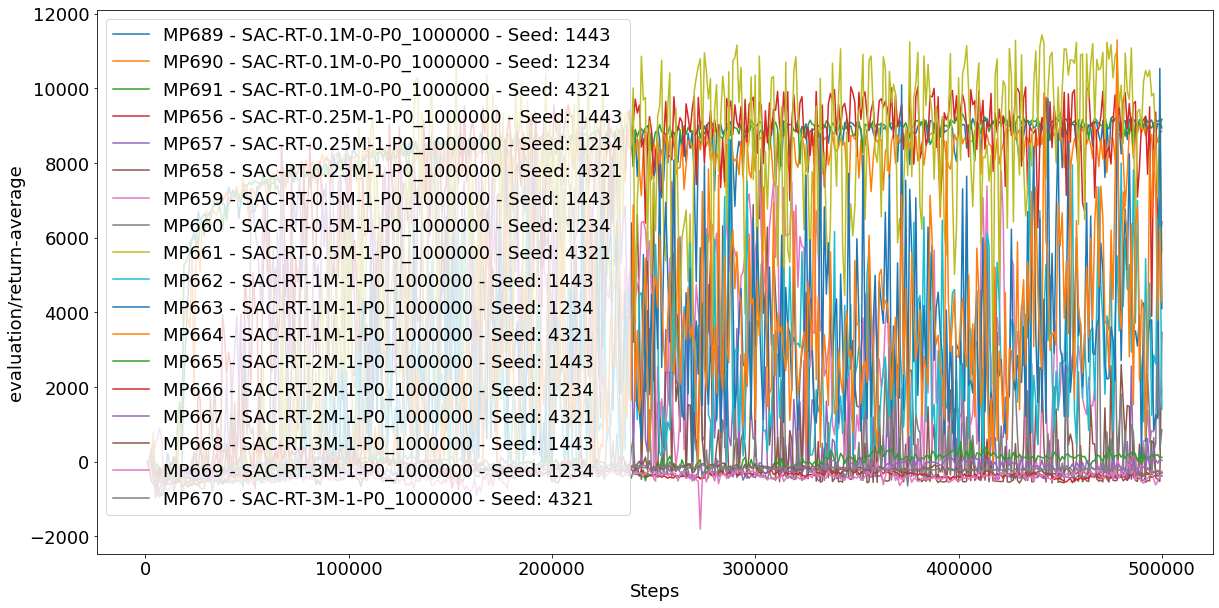

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP689,
    MP690,
    MP691,
    MP656,
    MP657,
    MP658,
    MP659,
    MP660,
    MP661,
    MP662,
    MP663,
    MP664,
    MP665,
    MP666,
    MP667,
    MP668,
    MP669,
    MP670,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

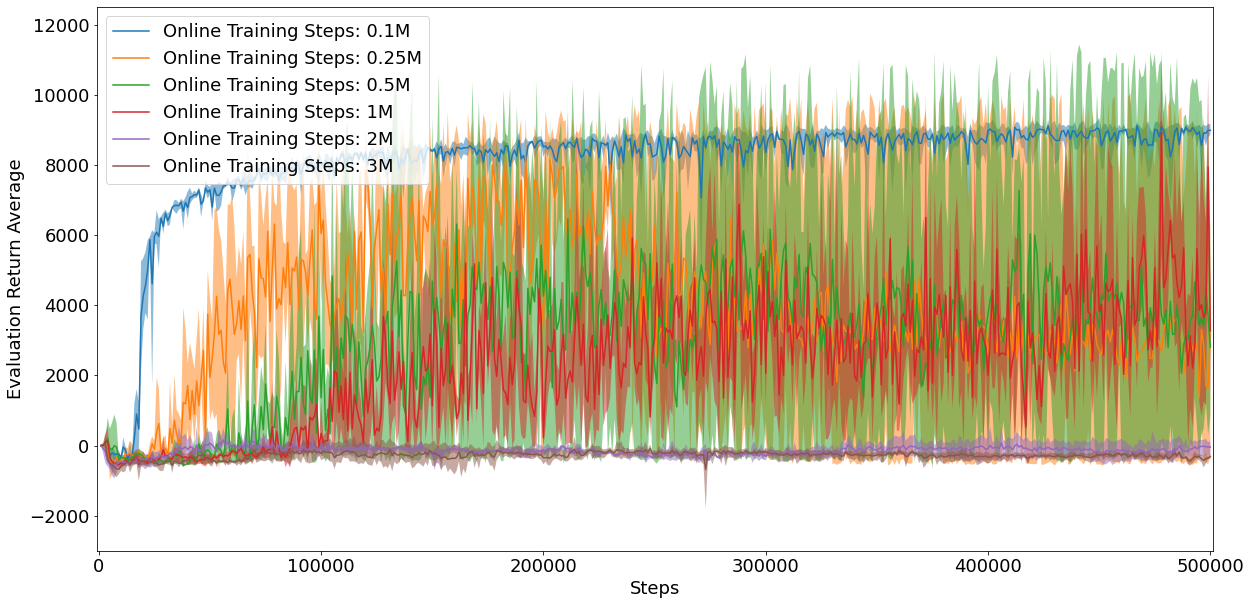

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

terminal_stats = {}
feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP689, MP690, MP691), '0.1'),
    ((MP656, MP657, MP658), '0.25'),
    ((MP659, MP660, MP661), '0.5'),
    ((MP662, MP663, MP664), '1'),
    ((MP665, MP666, MP667), '2'),
    ((MP668, MP669, MP670), '3'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    std_vals = stacked_data.std(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
    terminal_stats[exp_set[0].dataset] = {'mean': mean_vals[-1], 'std': std_vals[-1], 'text ': f'{mean_vals[-1]:.0f} ± {std_vals[-1]:.0f}'}
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend()
pass

In [17]:
terminal_stats

{'SAC-RT-0.1M-0-P0_1000000': {'mean': 8990.7890625,
  'std': 133.61411578174247,
  'text ': '8991 ± 134'},
 'SAC-RT-0.25M-1-P0_1000000': {'mean': 3196.2935892740884,
  'std': 2753.0549379100717,
  'text ': '3196 ± 2753'},
 'SAC-RT-0.5M-1-P0_1000000': {'mean': 2801.5966796875,
  'std': 2038.6917960456924,
  'text ': '2802 ± 2039'},
 'SAC-RT-1M-1-P0_1000000': {'mean': 3265.022216796875,
  'std': 1319.4098682655422,
  'text ': '3265 ± 1319'},
 'SAC-RT-2M-1-P0_1000000': {'mean': -42.94713592529297,
  'std': 176.3509074301283,
  'text ': '-43 ± 176'},
 'SAC-RT-3M-1-P0_1000000': {'mean': -314.3183898925781,
  'std': 52.906958250009254,
  'text ': '-314 ± 53'}}